Checkpoint Objective
This dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

dataset link : https://drive.google.com/file/d/1kVnOzZ84avAAY1mA2I_Oh6FH3UPEb-_3/view

Instructions
In this assignment you will have to take the following steps:

Import your dataset and perform initial analysis and visualization

Clean the data

Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)

You have to submit a jupyter notebook file.

Link : Get started with Google Colab

Please make sure it's a public shareable link.

# Import Dataset and Perform Initial Analysis and Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Untitled folder/DATASETS/bank.csv')

In [ ]:
# Initial exploration
print(data.head())  # View the first few rows
print(data.info())  # Get information about the dataset (data types, null values, etc.)
print(data.describe())  # Summary statistics for numerical columns


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

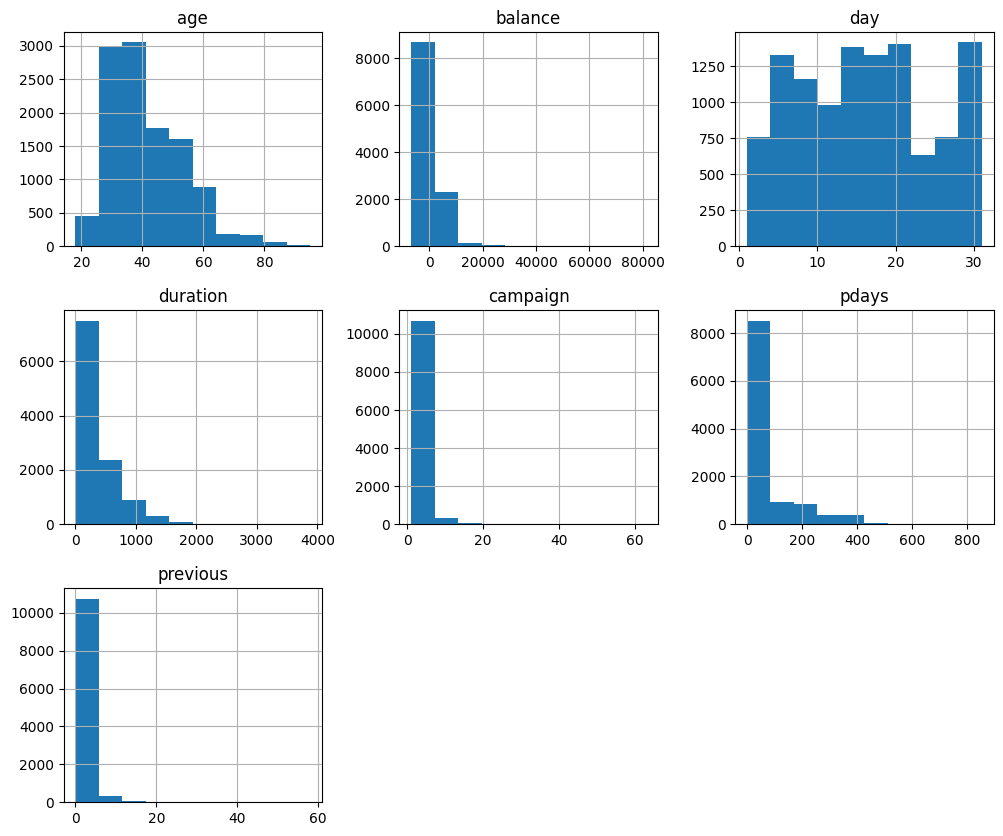

In [ ]:
# Visualization (for example)
# Plot histograms for numeric columns
data.hist(figsize=(12, 10))
plt.show()

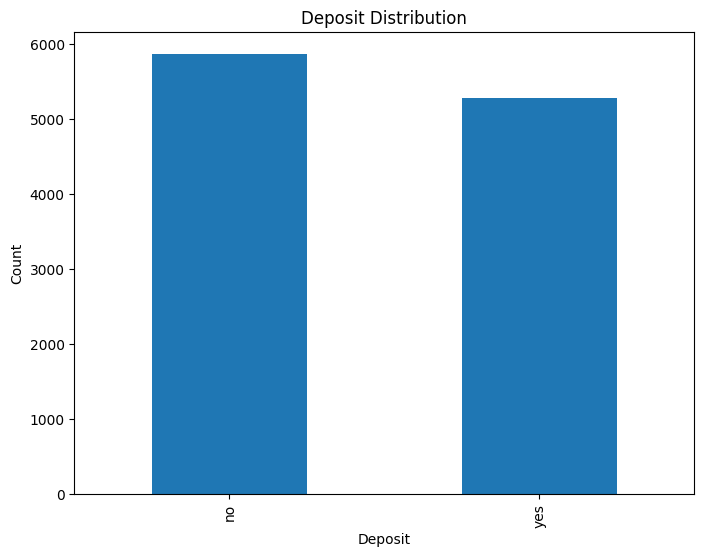

In [ ]:
# Visualize categorical variables (e.g., 'deposit')
plt.figure(figsize=(8, 6))
data['deposit'].value_counts().plot(kind='bar')
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.title('Deposit Distribution')
plt.show()


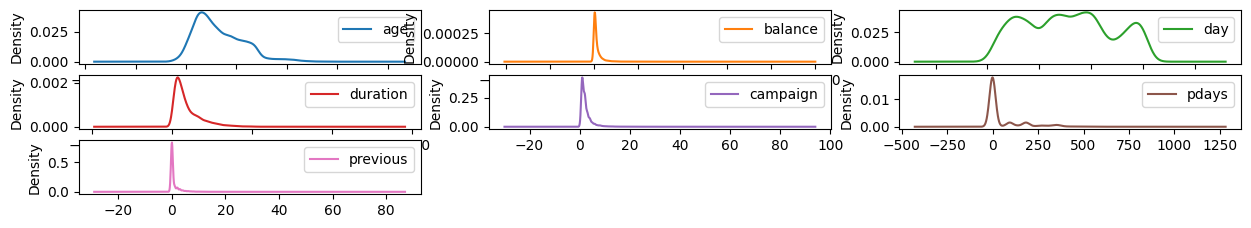

In [ ]:
data.plot(kind='density', subplots=True, sharex=False, layout=(12,3), figsize=(15,10))
plt.show()

<ipython-input-26-f462cbca1cb4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


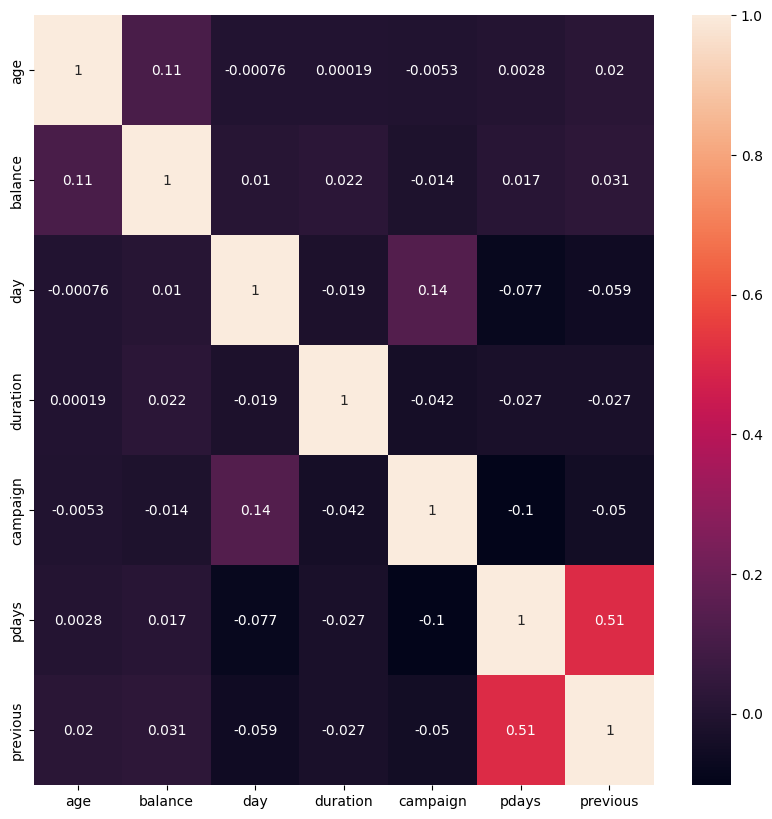

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Clean the Data

In [ ]:
# Handling missing values
data.isnull().sum()  # Check for missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:

# Remove duplicates, if they exist
data.duplicated().sum()
# Remove duplicates
#df.drop_duplicates(inplace=True)

# The dataframe has no duplicated rows


0

In [ ]:
# List of columns with 'object' dtype
object_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Columns with 'object' dtype:")
print(object_columns)

Columns with 'object' dtype:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [ ]:
# Encode categorical features
#I intend to replace the original categorical columns with their encoded values.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = [ 'job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [ ]:
# Split the data into features and target variable
X = data.drop('deposit', axis=1)
y = data['deposit']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Build a Deep Learning Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Create a Sequential model
model = Sequential()

In [ ]:
# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/20
280/280 [==============================] - 2s 3ms/step - loss: 0.4979 - accuracy: 0.7653 - val_loss: 0.4397 - val_accuracy: 0.8030
Epoch 2/20
280/280 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.8043 - val_loss: 0.4239 - val_accuracy: 0.8007
Epoch 3/20
280/280 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.8138 - val_loss: 0.4259 - val_accuracy: 0.8056
Epoch 4/20
280/280 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8138 - val_loss: 0.4252 - val_accuracy: 0.8092
Epoch 5/20
280/280 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8161 - val_loss: 0.4213 - val_accuracy: 0.8016
Epoch 6/20
280/280 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8183 - val_loss: 0.4205 - val_accuracy: 0.8052
Epoch 7/20
280/280 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8241 - val_loss: 0.4243 - val_accuracy: 0.8047
Epoch 

# Prediction code

In [ ]:
# Predictions using the trained model
predictions = model.predict(X_test_scaled)

70/70 [==============================] - 0s 1ms/step


In [ ]:
# Converting probabilities to binary outcomes
threshold = 0.5  # You can adjust this threshold as needed
binary_predictions = (predictions > threshold).astype('int')

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, binary_predictions))
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))


Accuracy: 0.8083296014330497

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1166
           1       0.79      0.82      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233


Confusion Matrix:
[[932 234]
 [194 873]]
